<h1 style='font-size: 50px; text-align: center; font-family: 'Formata', serif;'>
    Analysis of Complex Data, Master in Data Science & Engineering, 2023-2024
</h1>

<h1 style='font-size: 30px; font-weight: bold; margin-bottom: 10px; font-family: 'Formata', serif;'>
        1. Import libraries, classes, custom functions, and data load</h1>

In [1]:
import sys
import os

# Get the directory path of the notebook
notebook_directory = os.path.dirname(os.path.abspath("__file__"))

# Get the directory path of the project (one level up)
project_directory = os.path.dirname(notebook_directory)

# Add the project directory to the Python module search path
sys.path.append(project_directory)

# Now you can import the LoadJSON module from DataLoaderLocal
from shared_utilities.DataLoaderLocal import LoadJSON

import pandas as pd
import numpy as np
import utility_func as utils
import gdown
import networkx as nx
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tabulate import tabulate
from sklearn.cluster import DBSCAN

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

c:\Users\pport\anaconda3\Lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [16]:
############## Or go to Section 3 (DP - Data Preparation) to load a CSV file specifically created for the Recommendation System ##############
business, reviews, users = LoadJSON()

utils.YelpDatasets(business_df = business, reviews_df = reviews, users_df = users)

KeyboardInterrupt: 

### 1.1 TUCSON


In [ ]:
# 1. Filtering data for the city of Tucson and "open" in the "business" table only:
df_business_open_tucson = business[(business['city'] == 'Tucson') & (business['is_open'] == 1)]

# Filtering reviews related to businesses in Tucson:
df_reviews_tucson = reviews[reviews['business_id'].isin(df_business_open_tucson['business_id'])]

In [ ]:
df_business_open_tucson.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,AZ,85705,32.229872,-110.972342,4.5,10,1,"{'DriveThru': 'False', 'BusinessAcceptsCreditC...","Automotive, Auto Parts & Supplies, Auto Custom...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
56,txyXRytGjwOXvS8s4sc-WA,Smoothie King,1070 E Tucson Marketplace Blvd,Tucson,AZ,85713,32.186794,-110.954765,3.0,29,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Vitamins & Supplements, Ice Cream & Frozen Yog...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-21:0', '..."
67,eYxGFkxo6m3SYGVTh5m2nQ,Big Boyz Toyz Motorcycle Rentals,4158 E Grant Rd,Tucson,AZ,85712,32.250324,-110.903655,4.5,8,1,None,"Towing, Hotels & Travel, Automotive, Motorcycl...","{'Monday': '8:30-18:0', 'Tuesday': '8:30-18:0'..."
121,luGY5CJlb4CJ3LrBcSXMPA,Desert Design Center,4146 E Speedway Blvd,Tucson,AZ,85712,32.235866,-110.903676,3.0,5,1,"{'BusinessParking': '{'garage': False, 'street...","Furniture Stores, Shopping, Home & Garden","{'Monday': '9:30-18:0', 'Tuesday': '9:30-18:0'..."
125,wEfK2HIYNzkA1QYfUjHBaw,Leslie's,"7955 E Broadway Blvd, Ste 147",Tucson,AZ,85710,32.221542,-110.822101,2.5,15,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Hardware Stores, Home Services, Hot Tub & Pool...","{'Monday': '9:0-17:0', 'Tuesday': '7:0-18:0', ..."


In [ ]:
df_reviews_tucson.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
14,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05
75,ymhbOMW63B_vGaRFR3XT0A,yZdAhQ_KmKuCZmbBy9YDQg,5Ce3lZksYVkCbrihqylVHQ,5,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26
93,onlgwy5qGDEzddsrnIvtWg,pYXeL0RCqus2IfhthYCOyA,W7NxQw8UYFR0HLPrI08tvw,4,0,0,0,Don't know what it is but If my tummy's feelin...,2012-02-01 14:21:25
147,ypFqmURIY41F4pWaMW1VrQ,hToW2eoTAYlOcuNz7I73Cg,7L1kXfwU5XM6f6Jxo_L7Yg,5,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04


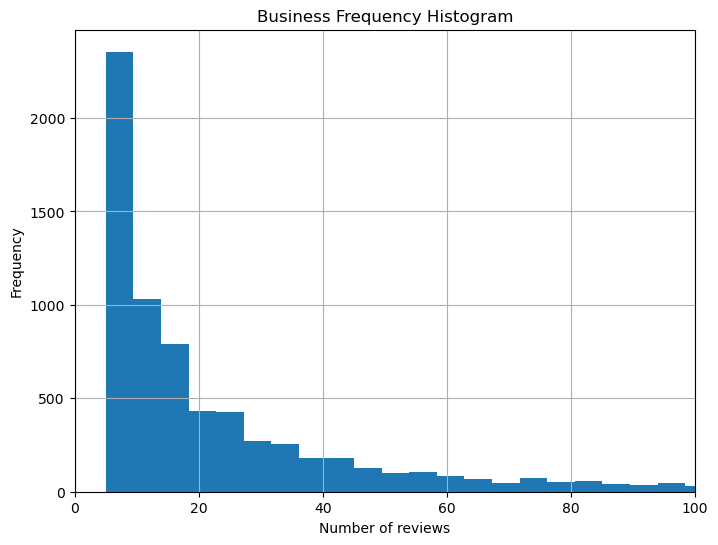

In [ ]:
business_counts = utils.NumReviewsBusiness(df_reviews_tucson)

### 2. DP - Data Preparation

In [ ]:
city = 'Tucson'
business_to_remove = list(business_counts[business_counts <= business_counts.quantile(0.10)].index)

rs_dataset = utils.PrepareDataFrameRS(business_df = business, 
                                      reviews_df = reviews, 
                                      users_df = users, 
                                      city = city,
                                      business_to_filter = business_to_remove)

rs_dataset

,user_id,business_id,stars
0,0,0,3
1,1,0,2
2,2,0,5
3,3,0,5
4,4,0,3
...,...,...,...
341463,79441,6417,5
341464,35957,6417,4
341465,80257,6417,1
341466,42870,6417,5


In [ ]:
# we will use the pivot function
matrix = rs_dataset.pivot(index = 'user_id', columns = 'business_id', values = 'stars')

print(f"Dataset's sparsity: {matrix.notnull().sum().sum() / (matrix.shape[0] * matrix.shape[1]):.2%}")

Dataset's sparsity: 0.05%


In [ ]:
# CSV file ready for Recommendation System building
rs_dataset = pd.read_csv('yelp_dataset/rs_dataset.csv')

In [ ]:
#Use the CSV file from Google drive
url='https://drive.google.com/file/d/1YkU4wycHX-917CjGddrN-mRpX8LvTN-I/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
new_rs_dataset = pd.read_csv(url)
new_rs_dataset.head(10)

,user_id,business_id,stars
0,0,0,3
1,1,0,2
2,2,0,5
3,3,0,5
4,4,0,3
5,5,0,4
6,6,0,4
7,7,0,5
8,8,0,4
9,9,0,5


In [ ]:
trainset, testset = utils.PrepareDataSurprise(df = rs_dataset)
##### Start with a lower sample size value, for example 50k, otherwise your computer will die #####
ubcf_trainset, ubcf_testset = utils.PrepareDataSurprise(df = rs_dataset, sample_size=250000)

In [ ]:
# Get the number of users and items in the trainset
num_users = trainset.n_users
num_items = trainset.n_items

# Get the number of ratings in the trainset
num_ratings = trainset.n_ratings

print(f"Number of users: {num_users}")
print(f"Number of items: {num_items}")
print(f"Number of ratings: {num_ratings}")

Number of users: 110744
Number of items: 7533
Number of ratings: 323174


###  3. DM - Data Modeling

In [ ]:
# Random Recommender
random_algo, random_rmse, random_predictions = utils.RandomRecommender(data_train = ubcf_trainset, 
                                                                       data_test = ubcf_testset)

RMSE: 1.9952


In [ ]:
# User-Based Collaborative Filtering
ubcf_algo, ubcf_rmse, ubcf_predictions = utils.UserBasedCollaborativeFiltering(data_train = ubcf_trainset, 
                                                                               data_test = ubcf_testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.5384


In [ ]:
# Item-Based Collaborative Filtering
ibcf_algo, ibcf_rmse, ibcf_predictions = utils.ItemBasedCollaborativeFiltering(data_train = trainset, 
                                                                               data_test = testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.5263


In [ ]:
# Singular Value Decomposition (Matrix Factorization)
svd_algo, svd_rmse, svd_predictions = utils.SingularValueDecomposition(data_train = trainset, 
                                                                       data_test = testset, 
                                                                       n_factors = 516, 
                                                                       n_epochs = 128, 
                                                                       lr = 0.005)

RMSE: 1.3319


In [ ]:
# Singular Value Decomposition ++ (Matrix Factorization)
svdpp_algo, svdpp_rmse, svdpp_predictions = utils.SingularValueDecompositionPP(data_train = trainset, 
                                                                               data_test = testset, 
                                                                               n_factors = 128, 
                                                                               n_epochs = 64, 
                                                                               lr = 0.007,
                                                                               reg_all = 0.02,
                                                                               cache_ratings = True)

RMSE: 1.4092


In [ ]:
train, test = utils.PrepareDataLightFM(rs_dataset, trainset, testset)
lightfm_algo, lightfm_rmse, lightfm_predictions = utils.MatrixFactorizationLightFM(train = train, 
                                                                                   test = test, 
                                                                                   n_components = 512, 
                                                                                   learning_schedule = 'adadelta',
                                                                                   learning_rate = 0.9,
                                                                                   loss_func = 'bpr',
                                                                                   epochs = 20)

In [ ]:
print(f"Random Recommender RMSE: {random_rmse:.3f}")
print(f"User-Based CF RMSE:      {ubcf_rmse:.3f}")
print(f"Item-Based CF RMSE:      {ibcf_rmse:.3f}")
print(f"SVD RMSE:                {svd_rmse:.3f}")
print(f"SVD++ RMSE:              {svdpp_rmse:.3f}")
print(f"LightFM RMSE:            {lightfm_rmse:.3f}")

Random Recommender RMSE: 1.983
User-Based CF RMSE:      1.548
Item-Based CF RMSE:      1.624
SVD RMSE:                1.382
SVD++ RMSE:              1.409


### 4. Model Evaluation

In [ ]:
pred, best_pred, worst_pred = utils.PredictionsRS(trainset = trainset, 
                                                  predictions = svd_predictions, 
                                                  n = 20)

In [ ]:
pred

,uid,iid,r_ui,est,details,user_n_rated,item_n_rated,err
0,s_JDz1gBlk8nDgwiFj9_cA,tBWjMqUc0yP5lRElCfDaKg,4.0,3.991208,{'was_impossible': False},82,331,0.008792
1,cZqR6gefC4HFYCrTZaQgLA,Dzha2x9C3FIvF7RGS8yaCA,4.0,3.035214,{'was_impossible': False},81,200,0.964786
2,6a3jzLuWCWIU0fRM5_NXGg,yip92_y6BgpQdcX486b_RQ,4.0,3.976318,{'was_impossible': False},2,265,0.023682
3,P-NTOAMFVSDFGkhcj4GaIQ,BauybYsfqd0y6KDrJ6ZxjQ,3.0,3.606030,{'was_impossible': False},233,66,0.606030
4,CBrNP7wCJ6hA_a_vlN_eww,zwrgCMuZyFX46mL3piDyjg,5.0,4.611367,{'was_impossible': False},13,849,0.388633
...,...,...,...,...,...,...,...,...
3260,36TtxM3KsIZxl3CRVIMVPA,CJoO4HYD0tZRXlZqA04wmw,5.0,4.247640,{'was_impossible': False},14,427,0.752360
3261,dPLNlZWD06cZqUfYb3sx7g,KflHa9pRDLPAmXxCpBDCZg,5.0,2.912373,{'was_impossible': False},0,102,2.087627
3262,qaqXuZ_JMt_8i9NFE2W2uQ,3aY8m5w6UnxXbRMhEUPUMg,5.0,4.294229,{'was_impossible': False},30,627,0.705771
3263,Cw_Sh52GhyQhvy2lUBZHRg,L3492THPX3WRpAKoPktqMg,5.0,4.529818,{'was_impossible': False},5,25,0.470182


In [ ]:
best_pred

,uid,iid,r_ui,est,details,user_n_rated,item_n_rated,err
45,G5s2Y6Oj0CW6kC2QaTbSoQ,ocjotK9u5F3E4CVXD_iNPw,5.0,5.0,{'was_impossible': False},12,310,0.0
1419,2MkOdtDkfqjbue--keV-_g,tyBZqnth65uHRwSAV1EEXw,5.0,5.0,{'was_impossible': False},28,166,0.0
2940,fgmZp-kpG_ZKIVhG6SbgEg,nLZh_-z9cMpCxSIumEXwrg,5.0,5.0,{'was_impossible': False},16,91,0.0
2231,WSwKfzZhLMNZiRZm39oKMg,ocjotK9u5F3E4CVXD_iNPw,5.0,5.0,{'was_impossible': False},3,310,0.0
1609,0wYru8Gp86yCfH0NH1u92Q,1Ksx9vG_RP5_TIxPONKqow,5.0,5.0,{'was_impossible': False},9,38,0.0
2385,kj1r6Az2lNOKWLCB85GB9Q,yjcIKn2T2QY_DjXWACsAFw,5.0,5.0,{'was_impossible': False},11,624,0.0
52,bMI9gPMzVLJans9IqC4vHA,v43QtzpLvAOB7Z1btygJhg,5.0,5.0,{'was_impossible': False},2,77,0.0
303,Pn-KSfDUivAvpBoE_nQDXQ,BMvPOv-nAMdWaho-R6iqKQ,5.0,5.0,{'was_impossible': False},2,18,0.0
177,xWmYN57XXZbg0LOK8WbbFQ,uNrcxIh3EOPunPg2cZ_aIQ,5.0,5.0,{'was_impossible': False},211,33,0.0
2448,hTaBY4ObN-vTNgABea55wg,6Cs52T0ItZ5TQ5Qx-UGaMw,5.0,5.0,{'was_impossible': False},37,714,0.0


In [ ]:
worst_pred

,uid,iid,r_ui,est,details,user_n_rated,item_n_rated,err
1646,7d0V05Z2AJw5K8CAJFIUlw,zZ01WQlcpI1_n806WKV3bA,1.0,4.280449,{'was_impossible': False},1,1279,3.280449
1682,9ZxgT6H1YoPPJLjwT0zcmw,a_oRfgkNFnulTada--P_Tg,1.0,4.296916,{'was_impossible': False},0,160,3.296916
481,vaJXMQdf2CG4UKZkwOylrg,Hi4AgS-uR-lEOF4oZl546g,1.0,4.333952,{'was_impossible': False},61,214,3.333952
1810,Yu8U01rvOBDHs9Gz7rTGWA,IjAjccegjWKQPu41iuMpZQ,1.0,4.334252,{'was_impossible': False},18,18,3.334252
1532,zzOd64i66_Z5roGjXmwCXA,Ei5HBqe012ImhqEr2ZH2gg,1.0,4.339149,{'was_impossible': False},12,370,3.339149
2669,v6pu5R_LgDLHSx8gIjo_FQ,Fd954WN-9jv3TlT0cj_bvA,1.0,4.353003,{'was_impossible': False},7,12,3.353003
2774,MMgdhN4Ah1CCseYFSF3Tjg,b5QkZFmbJhipaCZzNOB34Q,1.0,4.358893,{'was_impossible': False},0,20,3.358893
1081,KWLxxZKAcdUOBqBLMPW22w,cxt6yUH2B0gjMjfm5PT9MQ,1.0,4.402697,{'was_impossible': False},119,11,3.402697
1531,jsnLV7iDZaIVLRRVxFlxlQ,NpnKtL1sjeDVewwzVNQAOA,1.0,4.405844,{'was_impossible': False},3,4,3.405844
1562,Fxa70ztfpTB9j6tp8vOAhg,XD32ijW7RqkVeaTvOty_Kw,1.0,4.425440,{'was_impossible': False},0,31,3.425440


##### Is the function for the top n recommendations wrong?

In [ ]:
# Get recommendations for a specific user using the User-Based CF model
user_id = 'xzHsjIndsSXkeRmGJS9FuA'
svd_top_items, item_scores = utils.recommend_top_n(svd_algo, trainset, user_id, n=5)
print("Top 5 Item-Based CF Recommendations for User", user_id, ":", svd_top_items)

Top 5 Item-Based CF Recommendations for User xzHsjIndsSXkeRmGJS9FuA : ['FJDvhCGIwKuohPOK7JfLuA', 'wIRnrnk65_odDRmkaGjEvA', '9xMDYRurELJTav7-yq8M7g', 'pvRqGsEqQ0Olc_f1tLbmrQ', 'LRr-aw58xVMkUu0OSL_BpQ']


In [ ]:
# Perform t-SNE dimensionality reduction and create visualization
projection = utils.perform_tsne(svd_matrix = svd_algo.qi, 
                                n_componets = 2, 
                                n_iter = 500)

In [ ]:
#Plotly creates a visualization with each point corresponding to a business in the original dataset.
fig = px.scatter(
    projection, x='x', y='y'
)
fig.show()

### 5. Social Network Analysis

### Luis Example 
##### specific of he user: elite user (for how long or/and how recent), number of reviews, number of fans
##### interaction with other user: if they're friends, if they reviewed the same business, how similar was their review rating

In [ ]:
city = 'Tucson'
sna_df = pd.merge(reviews, business[(business['is_open'] == 1) & (business['city'] == city)], left_on='business_id', right_on='business_id', how='inner')
sna_df = pd.merge(sna_df, users, left_on='user_id', right_on='user_id', how='left')
sna_df = sna_df.drop_duplicates(subset=['user_id', 'business_id'], keep="first", inplace=False)

In [ ]:
display (sna_df)

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,name_x,address,city,state,postal_code,latitude,longitude,stars_y,review_count_x,is_open,attributes,categories,hours,name_y,review_count_y,yelping_since,useful_y,funny_y,cool_y,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None,Debra,1332.0,2012-09-04 23:57:25,1660.0,675.0,1300.0,"2014,2015,2016,2017,2018,2019,20,20,2021","IaqwLtG5Se-kt_MHBOalag, tBpyi-tXOYQlkjtQKPd5aw...",58.0,4.69,16.0,14.0,3.0,1.0,1.0,63.0,96.0,86.0,86.0,49.0,27.0
1,oUrKJzj_qZybqqPatE9q1A,n33TJBR6BPLrkOZiOdXLVg,YjUWPpI6HXG530lwP-fb2A,2,1,0,0,Let me start by saying the service is AWESOME!...,2015-09-10 02:41:13,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None,Johnny,4.0,2015-08-06 05:55:56,4.0,0.0,0.0,,None,0.0,3.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,E21dO10aI0pXCuoDNeSY6A,d3Jj46Fvsx9AT0f6z8NQcw,YjUWPpI6HXG530lwP-fb2A,5,0,0,0,Went here for the first time for the dinner bu...,2017-08-18 01:42:46,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None,Omar,11.0,2015-08-10 00:01:52,14.0,6.0,2.0,,"lT4vEIvt0-5LyVZX5Drypg, ZcS-SjUPDU2x5F8hBJez9Q...",1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7pn3auavTDZyDKlAAku1Og,aOGtShQrhkVF0REtkJCNkA,YjUWPpI6HXG530lwP-fb2A,5,0,0,0,This is my 1st experience here at Kettle. The...,2015-09-26 16:13:09,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None,Melanie,5.0,2013-05-18 19:41:03,1.0,2.0,0.0,,"e0oQQEt4AAxT-EgU1JZEiw, Mgd8dotWIvMDrbRUrA9H_A...",0.0,3.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Izs72sMY0cCXtHs5exObZw,-rGU3wo4fgEnGRboYdMTjw,YjUWPpI6HXG530lwP-fb2A,3,3,0,0,"Located on the west side of Starr Pass Blvd, K...",2015-06-22 16:08:27,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None,Adam,468.0,2012-05-01 02:34:27,688.0,139.0,173.0,"2014,2015","lrgq-Gr-l8m0v5WEmVXP6g, l_NVzIkJ5fa3VtIr2OPolg...",20.0,3.46,14.0,3.0,2.0,0.0,1.0,25.0,29.0,28.0,28.0,19.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341463,02vXiBDyuw1PX7smgj0weQ,SV4YacQQqgt9NtIcVC6_2g,x2GJf-ooT8CCtkr-ddUCNA,5,2,0,2,"Wow Great ""street"" tacos. Extremely creative ...",2021-09-29 15:25:10,Taqueria La Esquina,4876 S 6th Ave,Tucson,AZ,85714,32.163738,-110.968570,4.0,9,1,None,"Restaurants, Tacos, Mexican",None,Caryn,4.0,2020-10-08 15:46:07,3.0,1.0,3.0,,None,0.0,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
341464,xPC06ayiqjeCP91po47ISw,uAXNhbSjjNnFljN2KqwoJA,x2GJf-ooT8CCtkr-ddUCNA,4,0,0,0,Great spot on south 6th Ave with plenty indoor...,2022-01-17 17:47:08,Taqueria La Esquina,4876 S 6th Ave,Tucson,AZ,85714,32.163738,-110.968570,4.0,9,1,None,"Restaurants, Tacos, Mexican",None,Josh,10.0,2014-04-24 02:19:42,2.0,0.0,1.0,,"SmA1c1E5Yj9qhBrNs6ReWQ, Fp4jvuvNmsohcP3kuNIl2g...",0.0,4.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
341465,uNj1ugs2UbvpqkaFwkHi0A,1Si59xRZmdUcnT5q50fnTw,x2GJf-ooT8CCtkr-ddUCNA,1,0,1,0,"Just horrible. Bland, skimpy tacos. Rude servi..."

In [ ]:
user1_id = '8g_iMtfSiwikVnbP2etR0A'
user2_id = 'IaqwLtG5Se-kt_MHBOalag'

value = utils.Weight(user1_id, user2_id, users, sna_df)
print(value)
print('The weight of the connection between the user {} and user {} is: {}'.format(user1_id, user2_id, list(value)[0]))

98159    6.58
Name: fans, dtype: float64
The weight of the connection between the user 8g_iMtfSiwikVnbP2etR0A and user IaqwLtG5Se-kt_MHBOalag is: 6.58


### Creation of the Dataset to be used - City - Tucson, Business_Open Only and Categorie - Sandwich 

In [ ]:
city = 'Tucson'

# Filtrar por cidade
business_city_filtered = business[(business['is_open'] == 1) & (business['city'] == city)]

# Filtrar por categoria "Sandwich"
category_to_filter = 'Sandwich'
business_category_filtered = business_city_filtered[business_city_filtered['categories'].str.contains(category_to_filter, case=False, na=False)]

# Mesclar com os DataFrames
sna_df = pd.merge(reviews, business_category_filtered, left_on='business_id', right_on='business_id', how='inner')
sna_df = pd.merge(sna_df, users, left_on='user_id', right_on='user_id', how='left')
sna_df = sna_df.drop_duplicates(subset=['user_id', 'business_id'], keep="first", inplace=False)
sna_df = sna_df[['user_id', 'business_id', 'friends', 'fans', 'elite']]
sna_df = sna_df.dropna(subset=['user_id', 'business_id'])

display (sna_df)

unique_user_ids = sna_df['user_id'].nunique()
print(f"Total de valores de 'user_id' diferentes: {unique_user_ids}")
# Keep unique rows based on the 'User' column
sna_df = sna_df.drop_duplicates(subset='user_id')

sna_np = np.array(sna_df)

,user_id,business_id,friends,fans,elite
0,LpZfJekvMo5S61UBAmuyHw,cXAKeC-EgVChIxhS7fscmw,"Yizq12likvDS3wLr6cLxfQ, 6pRwtYxm_bW0aikeC7BB5Q...",3,"2011,2012"
1,yrjT7IchufcYeN5RZJjxyw,cXAKeC-EgVChIxhS7fscmw,"lBY1uLUeKzE-3kAOWDvVow, RBUq9LkmsZHIsu1Mu8vuKA...",9,2009
2,5aMysI3ZNdHEmRcap4LaaQ,cXAKeC-EgVChIxhS7fscmw,None,0,
3,xnNdEAZvLaKboS7YGh6Gaw,cXAKeC-EgVChIxhS7fscmw,None,0,
4,JUT0U3HTSB3kz9Wh7N0GqA,cXAKeC-EgVChIxhS7fscmw,"1kpMAKRZuAz3OzxBav3XTg, rQrqrb5dFztAeFYwyqbygA...",294,"2010,2011,2012,2013,2014,2015,2016"
...,...,...,...,...,...
30455,bN5U-3k2Ad3JSEf_CXGrNw,WnUm6q-zuE6zkYxj1I-Q2w,None,0,
30456,CAmfeNA8xyA154b2KEkn9g,WnUm6q-zuE6zkYxj1I-Q2w,"20XtzCxE_8ETitMqED97Mg, YsOLFVvQJztJtI4EEkLQ8g...",0,
30457,6grll10FphBk4foML8illw,WnUm6q-zuE6zkYxj1I-Q2w,"CaXFxgBw2m9xRxxbbCvDug, VPTeTaJEpawBf7GTfYCZfA...",4,2021
30458,aU9Onn8eHwUcz-d-Tj0Qtg,WnUm6q-zuE6zkYxj1I-Q2w,"qJPvDTi2UsIGjDYW1drwyA, GrMTEQMPNU1am0_PsiYDHQ...",14,"2017,2018,2019,20,20,2021"


Total de valores de 'user_id' diferentes: 18428


In [2]:
#File ID from your Google Drive URL
file_id = '10rPFqKVBtc7LO5q-lzUuQNeWwcCXyf0p'
output = 'data.csv'  # Local filename to save the downloaded CSV file

url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, output, quiet=False)

# Read the downloaded CSV file with a semicolon delimiter
sna_df = pd.read_csv(output, delimiter=';')
sna_df = sna_df.drop_duplicates(subset='user_id')
sna_df = sna_df.dropna(subset=['user_id', 'business_id'])


sna_df['friends'] = sna_df['friends'].replace('None', np.nan)
sna_df.fillna("",inplace=True)

# Remove lines where the values of 'friends' or 'elite' are None
#sna_df = sna_df.dropna(subset=['friends', 'elite'])

# Now, create the NumPy array
sna_np = np.array(sna_df)
#display(sna_df)

# Create a subset of sna_df with the first 5000 rows and the first 5 columns
sna_df = sna_df.iloc[:5000, :5]

sna_np = np.array(sna_df)

# Display the subset of the DataFrame
display(sna_df)

# The subset of the NumPy array can be used directly
display(sna_np)

Downloading...
From: https://drive.google.com/uc?id=10rPFqKVBtc7LO5q-lzUuQNeWwcCXyf0p
To: c:\Users\pport\OneDrive\Ambiente de Trabalho\MECD\2ºAno\ADC\Project\Recommendation-System---\RS&SNA\data.csv
100%|██████████| 59.1M/59.1M [00:05<00:00, 11.1MB/s]


,user_id,business_id,friends,fans,elite
0,LpZfJekvMo5S61UBAmuyHw,cXAKeC-EgVChIxhS7fscmw,"Yizq12likvDS3wLr6cLxfQ, 6pRwtYxm_bW0aikeC7BB5Q...",3.0,"2011,2012"
1,yrjT7IchufcYeN5RZJjxyw,cXAKeC-EgVChIxhS7fscmw,"lBY1uLUeKzE-3kAOWDvVow, RBUq9LkmsZHIsu1Mu8vuKA...",9.0,2009
2,5aMysI3ZNdHEmRcap4LaaQ,cXAKeC-EgVChIxhS7fscmw,,0.0,
3,xnNdEAZvLaKboS7YGh6Gaw,cXAKeC-EgVChIxhS7fscmw,,0.0,
4,JUT0U3HTSB3kz9Wh7N0GqA,cXAKeC-EgVChIxhS7fscmw,"1kpMAKRZuAz3OzxBav3XTg, rQrqrb5dFztAeFYwyqbygA...",294.0,"2010,2011,2012,2013,2014,2015,2016"
...,...,...,...,...,...
5865,X56eAdbUWSoe72cjeNO1zA,9zlIJ7Q5W4AENjpGgaNSsQ,"061G6mL-dr1dXv1dCRX9kg, trd4-ULNhuwleObnS4hKjg...",1.0,
5867,WfietwxXBDs_whgmYKc49w,9zlIJ7Q5W4AENjpGgaNSsQ,,1.0,
5869,Dp21-MPulbup4oZVr0I42w,9zlIJ7Q5W4AENjpGgaNSsQ,,0.0,
5870,fBHzcxmNNNIfIsHeoKxicg,9zlIJ7Q5W4AENjpGgaNSsQ,,1.0,


array([['LpZfJekvMo5S61UBAmuyHw', 'cXAKeC-EgVChIxhS7fscmw',
        'Yizq12likvDS3wLr6cLxfQ, 6pRwtYxm_bW0aikeC7BB5Q, mNSLx_rjYGPGGj9duWcijA, rknpZzb1UIFY0nvF-NcKww, IfUap3l-UVc7-FH_j8wPFw, alDu-5mL9lgcpPsfbRkBig, -_tiQlfSQmZcYIQs6viVBQ, qO3BLn-zmyjj8dedMsfOMw, JUT0U3HTSB3kz9Wh7N0GqA, CTE_mO0FS-WI_KYFf6BqhQ, 3vofzamIMkrS0PPf5aSmRQ, wYPDNUDTbPz1eTbaBkERlA, JT8u6XdxNZp4SIvn6t938w, 0XaQ6vvgy5pi5XAaz12mOg, g-yFD96019WgqcNEfy3oYA, 6p1NDChnIpGl29Ce3cMKWg, 6ObFF8-uKnOAlXuSH4TlyQ, Fv3v5qxkb5CA9kMdYx2XDw, VhNNqkNpQIEndtqZ5k9gqg, cbBK4jl_Z8SMHnWAcP-QnA, UCyF8oWM3lVc-5gC63ozwA, gRnHwnPBYvPGEHxgH0hq6A',
        3.0, '2011,2012'],
       ['yrjT7IchufcYeN5RZJjxyw', 'cXAKeC-EgVChIxhS7fscmw',
        'lBY1uLUeKzE-3kAOWDvVow, RBUq9LkmsZHIsu1Mu8vuKA, cyU1Eq5AFcom3Ar19nhAVw, oL3IFSLKuAvBuqJLVWV6Dw, QRtvA7n8-za61i3j7GBlXw, apsKdQcmF4_vED3IKXHGlQ, hO7dk6P8jRk0eex8Y-MwFA, yk8K9rDCeJk7aLH-Y6zNtg, LciBOQmhfRyin8BxW-WP5Q, LprR2iyMB5w3pJJpK3o_8Q, CnrJi4QXQwAONU7p_s8iOw, AgBaNXPL9gDhUTzU8y1zwA, A_kjbEIjOGTsZnqHNP

In [3]:
user_combinations = utils.ComputeCombinations(sna_df, 5000)
users1, user2_ids = utils.PrepareDataSNA(user_combinations, sna_np)
weights = utils.Weight(users1, user2_ids)

In [4]:
print('The combination {} has the weight {}'.format(user_combinations[0], weights[0]))

The combination ['g50mkWhMFt8a35VfiPbYhA' 'Pno2uqiSOo8x6cLhlLa-bA'] has the weight 5.15


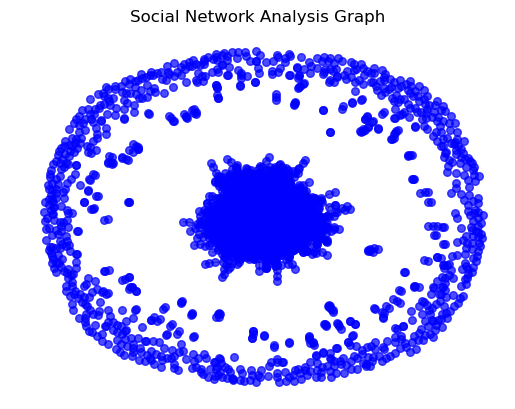

Number of nodes (users): 5000
Number of edges: 5000


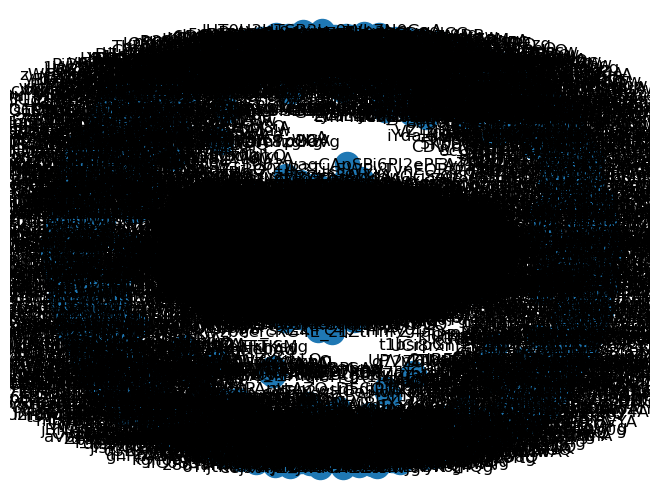

Connection between user LpZfJekvMo5S61UBAmuyHw and user TIlbuLIsGLISCoI9pWlwyQ, weight: 2.03
Connection between user LpZfJekvMo5S61UBAmuyHw and user s679l45RlXujvW8YalSNoA, weight: 2.03
Connection between user yrjT7IchufcYeN5RZJjxyw and user rfdNg7_6TyX2GqOH8D2uvw, weight: 1.09
Connection between user yrjT7IchufcYeN5RZJjxyw and user AUX8lphqZY4T6NXr2hrCLA, weight: 1.09
Connection between user yrjT7IchufcYeN5RZJjxyw and user d6zIVWiJyPB6PZuAxVexwg, weight: 1.09
Connection between user 5aMysI3ZNdHEmRcap4LaaQ and user 8W43xoMSFPYzUO8ghUIrVg, weight: 1.0
Connection between user 5aMysI3ZNdHEmRcap4LaaQ and user fPbkv1VU7G94hrfJE6kKDg, weight: 1.0
Connection between user 5aMysI3ZNdHEmRcap4LaaQ and user WHJPa6pSjQyZAGQvhd5j3Q, weight: 1.0
Connection between user xnNdEAZvLaKboS7YGh6Gaw and user uq6zAx_V6mKjFqJ9RjmiPA, weight: 1.0
Connection between user xnNdEAZvLaKboS7YGh6Gaw and user vf-kcUchx1Y7ioAson_oTQ, weight: 1.0
Connection between user rFuJNas7K_l2oejUbwFf7A and user q0dJI7tOUW8By2vwX2g

In [5]:
# Create a new graph
G = nx.Graph()

# Add nodes (users) to the graph
for user_id in sna_df['user_id'].unique():
    if not G.has_node(user_id):
        G.add_node(user_id)

# Add edges with weights calculated based on the selected combinations
for i, (user1_id, user2_id) in enumerate(user_combinations):
    weight_value = weights[i] # Get the weight corresponding to the current combination
    G.add_edge(user1_id, user2_id, weight=weight_value)


# Visualize the graph
pos = nx.spring_layout(G)  # Layout algorithm (you can choose other layouts)
# Draw nodes as dots without labels
nx.draw_networkx_nodes(G, pos, node_size=30, node_color='b', alpha=0.7)
# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')  # Turn off axis labels
plt.title("Social Network Analysis Graph")
plt.show()


# Display information about the graph
print(f"Number of nodes (users): {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Visualize the network (optional)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.title("Pairs of Connected User IDs with Connection Weights")
plt.show()

# Go through all the edges and print the pairs of user IDs with connection weight
for user1_id, user2_id, data in G.edges(data=True):
    weight_value = data['weight']
    print(f"Connection between user {user1_id} and user {user2_id}, weight: {weight_value}")

#### Community Identification (Community Detection)
##### Community detection is an analysis that tries to identify groups of highly interconnected nodes in a network.

In [6]:
# Detect communities in the network using the Louvain algorithm
partition = community_louvain.best_partition(G)

# Display each user's community
for user_id, community_id in partition.items():
    print(f"User {user_id} belongs to the community {community_id}")

User LpZfJekvMo5S61UBAmuyHw belongs to the community 0
User yrjT7IchufcYeN5RZJjxyw belongs to the community 0
User 5aMysI3ZNdHEmRcap4LaaQ belongs to the community 1
User xnNdEAZvLaKboS7YGh6Gaw belongs to the community 2
User JUT0U3HTSB3kz9Wh7N0GqA belongs to the community 3
User rFuJNas7K_l2oejUbwFf7A belongs to the community 4
User zBP5tlAva26B4yjssjvHzw belongs to the community 5
User sQb9MhSa-N1TKZ_Eqb1CAg belongs to the community 6
User fgi0msNq1oNmt17ypzViXw belongs to the community 7
User Q7UMq9cphfd3B3hrz7DRUQ belongs to the community 8
User SF2iu0XmrTfTsRx4Hp8zOA belongs to the community 0
User VRyj-ZIXi9mZeACBQVWP0w belongs to the community 9
User rVONIZ9xbSCcN7W0qYwPQA belongs to the community 0
User 6yUT3FOSsbNJS6ydik1ATA belongs to the community 10
User 8xwh0aaOEBfNaCqheLdBmA belongs to the community 11
User mo5dMvHDT4C4MLZCTC0crg belongs to the community 6
User AbOaXoif__VIBGEvNKXONQ belongs to the community 9
User 14lRtON4giDrSaaY2jUIfQ belongs to the community 1
User 5ix

C:\Users\pport\AppData\Local\Temp\ipykernel_32180\3471543641.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


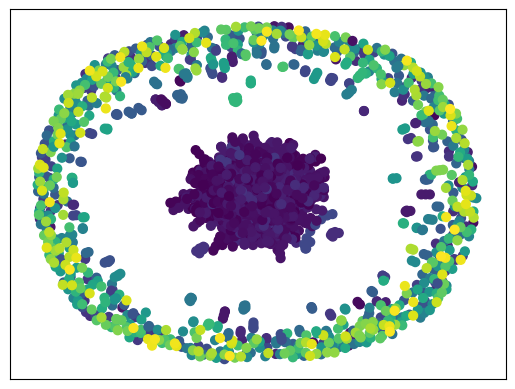

In [7]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Visualizing the Network Graph with Node Partitioning")
plt.show()

#### Node centrality
##### Node centrality measures the importance of nodes in a network. There are different centrality metrics, such as degree centrality, betweenness centrality and closeness centrality.

In [35]:
# Calculate centrality measures (e.g., degree centrality, betweenness centrality and closeness centrality)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Display these centrality measures for each node
for node, degree, betweenness, closeness in zip(G.nodes(), degree_centrality.values(), betweenness_centrality.values(), closeness_centrality.values()):
    print(f"Node {node} - Degree Centrality: {degree}, Betweenness Centrality: {betweenness}, Closeness Centrality: {closeness}")

Node LpZfJekvMo5S61UBAmuyHw - Degree Centrality: 0.00040008001600320064, Betweenness Centrality: 0.000767452984709162, Closeness Centrality: 0.0673627132861901
Node yrjT7IchufcYeN5RZJjxyw - Degree Centrality: 0.000600120024004801, Betweenness Centrality: 0.0008630419745896159, Closeness Centrality: 0.07452516834833665
Node 5aMysI3ZNdHEmRcap4LaaQ - Degree Centrality: 0.000600120024004801, Betweenness Centrality: 0.0012929930372602538, Closeness Centrality: 0.06578701044906177
Node xnNdEAZvLaKboS7YGh6Gaw - Degree Centrality: 0.00040008001600320064, Betweenness Centrality: 0.0006326995691255098, Closeness Centrality: 0.07473888612111239
Node JUT0U3HTSB3kz9Wh7N0GqA - Degree Centrality: 0.0, Betweenness Centrality: 0.0, Closeness Centrality: 0.0
Node rFuJNas7K_l2oejUbwFf7A - Degree Centrality: 0.00040008001600320064, Betweenness Centrality: 0.0017988222832192873, Closeness Centrality: 0.08292100672759432
Node zBP5tlAva26B4yjssjvHzw - Degree Centrality: 0.00040008001600320064, Betweenness Ce

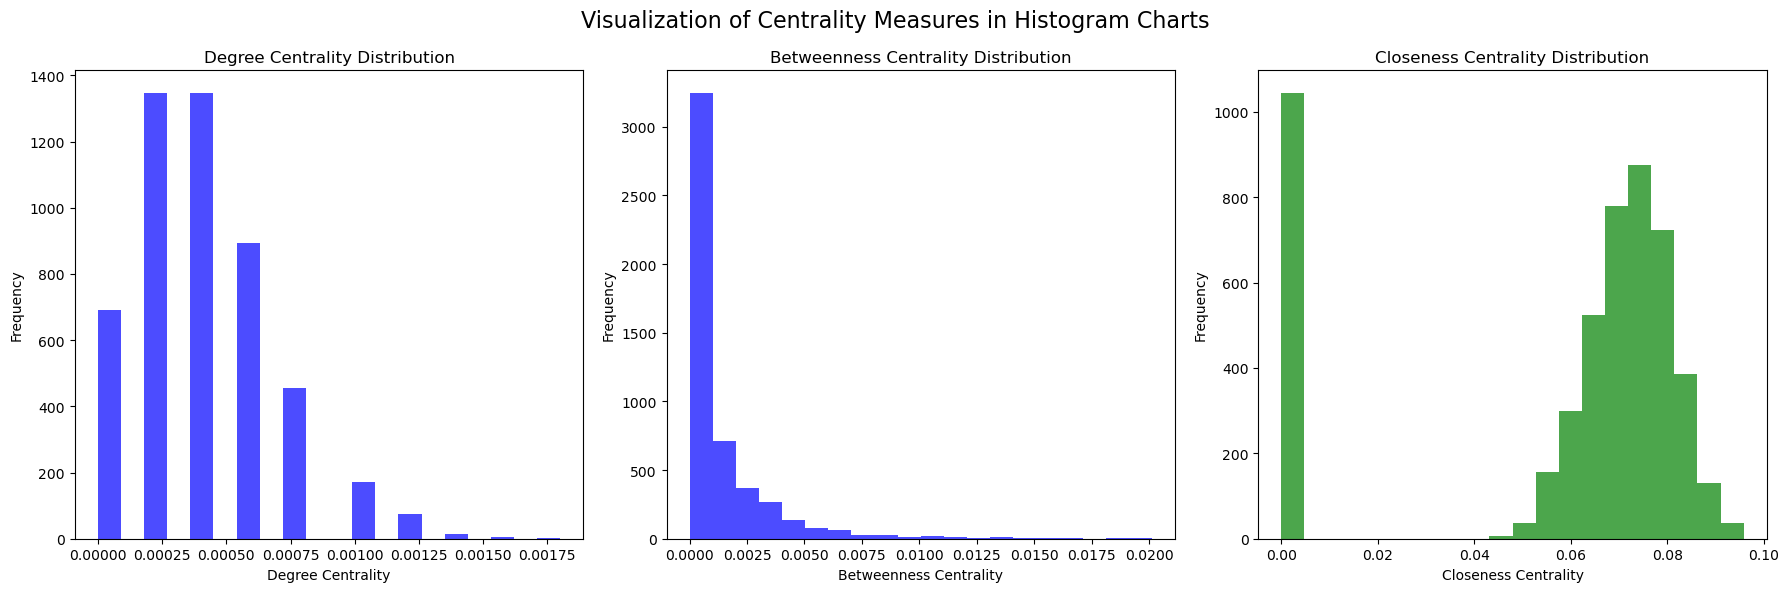

In [12]:
# Create histograms or scatter plots to visualize the centrality measures
plt.figure(figsize=(18, 6))  # Ajuste o tamanho da figura conforme necessário
plt.suptitle("Visualization of Centrality Measures in Histogram Charts", fontsize=16)

# Degree Centrality
plt.subplot(1, 3, 1)  # Uma linha, três colunas, primeiro gráfico
plt.hist(degree_centrality.values(), bins=20, alpha=0.7, color='b')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Distribution')

# Betweenness Centrality
plt.subplot(1, 3, 2)  # Uma linha, três colunas, segundo gráfico
plt.hist(betweenness_centrality.values(), bins=20, alpha=0.7, color='b')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality Distribution')

# Closeness Centrality
plt.subplot(1, 3, 3)  # Uma linha, três colunas, terceiro gráfico
plt.hist(closeness_centrality.values(), bins=20, alpha=0.7, color='g')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality Distribution')

plt.tight_layout()
plt.show()

In [10]:
# List the 10 most central users
top_users = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
print("The 10 most central users:")
for user_id in top_users:
    print(f"User {user_id}: Degree Centrality = {degree_centrality[user_id]}")

The 10 most central users:
User e6zue7IUFyKanYiF2_hJEQ: Degree Centrality = 0.0018003600720144029
User 3CdX9anUthQqnoZz_kOZyg: Degree Centrality = 0.0016003200640128026
User PEvrhKgW923jPcoB48MQAg: Degree Centrality = 0.0016003200640128026
User 3Xk0NSmAfSSxApL91KAyKw: Degree Centrality = 0.0016003200640128026
User TgMA0MFz3rOTuCghfdke_w: Degree Centrality = 0.0016003200640128026
User tKhz3sZqhBg-cXKZ_fqE5g: Degree Centrality = 0.0016003200640128026
User #NOME?: Degree Centrality = 0.0014002800560112022
User GC8UM6vKNNgdwLto_-5tiA: Degree Centrality = 0.0014002800560112022
User uZag8URgERqGr7xI31CvgA: Degree Centrality = 0.0014002800560112022
User Gyuv7sI1bIHVENdxIfEhtw: Degree Centrality = 0.0014002800560112022


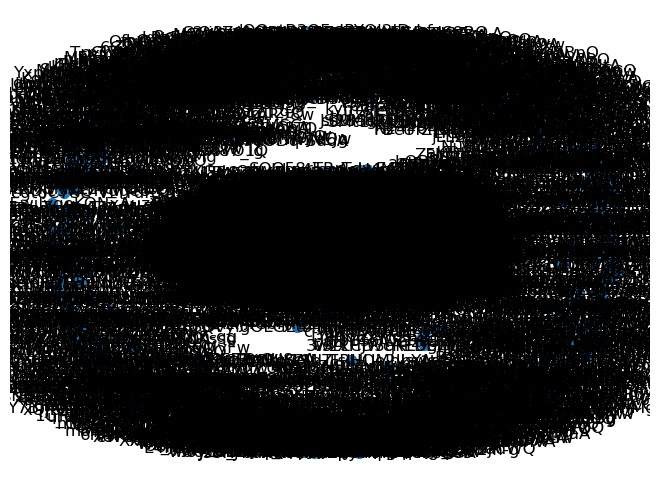

In [11]:
# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_size=50)
plt.show()

#### Cluster Analysis
##### Cluster analysis groups similar nodes into clusters or groups. Let's use the K-Means cluster detection algorithm as an example

In [36]:
# Get the node positions (to use as features)
node_positions = nx.spring_layout(G)

# Convert the positions into a NumPy array
node_positions_array = np.array(list(node_positions.values()))

# Set the desired number of clusters
num_clusters = 3

# Run the K-Means algorithm
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(node_positions_array)

# Get cluster labels for each node
cluster_labels_kmeans = kmeans.labels_

# Display the nodes and their cluster labels
for node, label in zip(G.nodes(), cluster_labels_kmeans):
    print(f"Node {node} belongs to cluster {label}")

c:\Users\pport\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Node LpZfJekvMo5S61UBAmuyHw belongs to cluster 1
Node yrjT7IchufcYeN5RZJjxyw belongs to cluster 1
Node 5aMysI3ZNdHEmRcap4LaaQ belongs to cluster 1
Node xnNdEAZvLaKboS7YGh6Gaw belongs to cluster 1
Node JUT0U3HTSB3kz9Wh7N0GqA belongs to cluster 0
Node rFuJNas7K_l2oejUbwFf7A belongs to cluster 1
Node zBP5tlAva26B4yjssjvHzw belongs to cluster 1
Node sQb9MhSa-N1TKZ_Eqb1CAg belongs to cluster 1
Node fgi0msNq1oNmt17ypzViXw belongs to cluster 1
Node Q7UMq9cphfd3B3hrz7DRUQ belongs to cluster 1
Node SF2iu0XmrTfTsRx4Hp8zOA belongs to cluster 1
Node VRyj-ZIXi9mZeACBQVWP0w belongs to cluster 1
Node rVONIZ9xbSCcN7W0qYwPQA belongs to cluster 1
Node 6yUT3FOSsbNJS6ydik1ATA belongs to cluster 1
Node 8xwh0aaOEBfNaCqheLdBmA belongs to cluster 1
Node mo5dMvHDT4C4MLZCTC0crg belongs to cluster 1
Node AbOaXoif__VIBGEvNKXONQ belongs to cluster 1
Node 14lRtON4giDrSaaY2jUIfQ belongs to cluster 1
Node 5ixKDo5KQlvEqAJeyCUpsA belongs to cluster 1
Node d1-X-q3_HlJyAGKSrdw2NA belongs to cluster 2
Node yDveatcQlexv_Fi

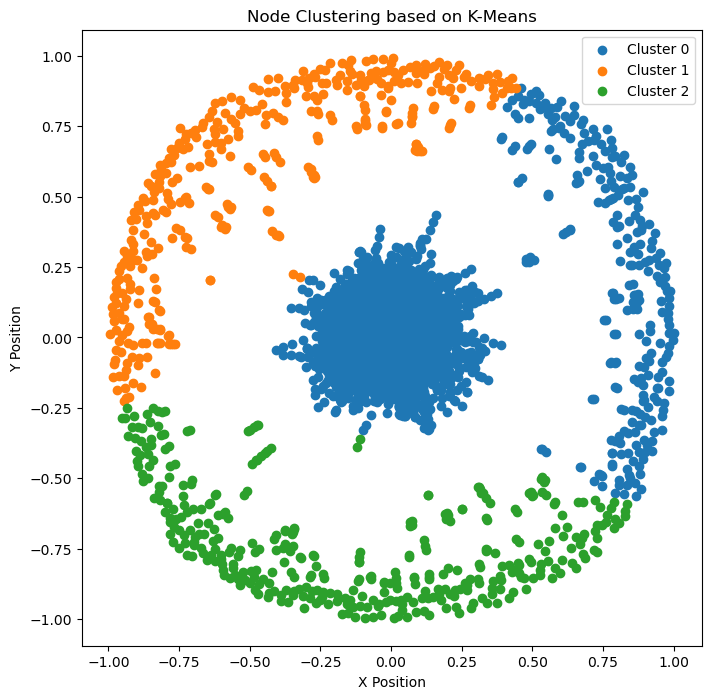

In [14]:
# Create a scatter plot of node positions with cluster color coding
plt.figure(figsize=(8, 8))
for cluster_id in range(num_clusters):
    nodes_in_cluster = [node for node, label in zip(G.nodes(), cluster_labels_kmeans) if label == cluster_id]
    positions_in_cluster = {node: node_positions[node] for node in nodes_in_cluster}
    x = [pos[0] for pos in positions_in_cluster.values()]
    y = [pos[1] for pos in positions_in_cluster.values()]
    plt.scatter(x, y, label=f'Cluster {cluster_id}')

# Set labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Node Clustering based on K-Means')

# Add legend
plt.legend()

# Display the plot
plt.show()

##### Let's use the DBSCAN cluster detection algorithm as another approach

In [34]:
# Set the desired epsilon (maximum distance between points in the same cluster) and minimum samples
epsilon = 0.1  # Adjust this value based on your data and desired clustering density
min_samples = 5  # Adjust this value based on your data and desired minimum cluster size

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
cluster_labels_dbscan = dbscan.fit_predict(node_positions_array)

# Display the nodes and their cluster labels
for node, label in zip(G.nodes(), cluster_labels_dbscan):
    print(f"Node {node} belongs to cluster {label}")

Node LpZfJekvMo5S61UBAmuyHw belongs to cluster 0
Node yrjT7IchufcYeN5RZJjxyw belongs to cluster 0
Node 5aMysI3ZNdHEmRcap4LaaQ belongs to cluster 0
Node xnNdEAZvLaKboS7YGh6Gaw belongs to cluster 0
Node JUT0U3HTSB3kz9Wh7N0GqA belongs to cluster 1
Node rFuJNas7K_l2oejUbwFf7A belongs to cluster 0
Node zBP5tlAva26B4yjssjvHzw belongs to cluster 0
Node sQb9MhSa-N1TKZ_Eqb1CAg belongs to cluster 0
Node fgi0msNq1oNmt17ypzViXw belongs to cluster 1
Node Q7UMq9cphfd3B3hrz7DRUQ belongs to cluster 0
Node SF2iu0XmrTfTsRx4Hp8zOA belongs to cluster 0
Node VRyj-ZIXi9mZeACBQVWP0w belongs to cluster 0
Node rVONIZ9xbSCcN7W0qYwPQA belongs to cluster 0
Node 6yUT3FOSsbNJS6ydik1ATA belongs to cluster 0
Node 8xwh0aaOEBfNaCqheLdBmA belongs to cluster 0
Node mo5dMvHDT4C4MLZCTC0crg belongs to cluster 0
Node AbOaXoif__VIBGEvNKXONQ belongs to cluster 0
Node 14lRtON4giDrSaaY2jUIfQ belongs to cluster 0
Node 5ixKDo5KQlvEqAJeyCUpsA belongs to cluster 0
Node d1-X-q3_HlJyAGKSrdw2NA belongs to cluster 1
Node yDveatcQlexv_Fi

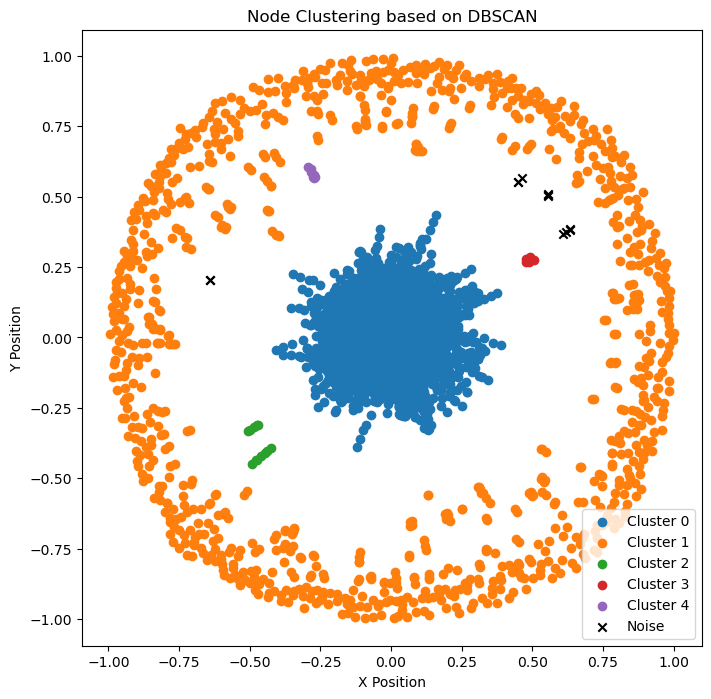

In [16]:
# Create a scatter plot of node positions with cluster color coding
plt.figure(figsize=(8, 8))

# Extract unique cluster labels (excluding noise points labeled as -1)
unique_labels = np.unique(cluster_labels_dbscan[cluster_labels_dbscan != -1])

for label in unique_labels:
    nodes_in_cluster = [node for node, cluster_label in zip(G.nodes(), cluster_labels_dbscan) if cluster_label == label]
    positions_in_cluster = {node: node_positions[node] for node in nodes_in_cluster}
    x = [pos[0] for pos in positions_in_cluster.values()]
    y = [pos[1] for pos in positions_in_cluster.values()]
    plt.scatter(x, y, label=f'Cluster {label}')

# Mark noise points as a separate cluster (-1)
noise_points = [node for node, cluster_label in zip(G.nodes(), cluster_labels_dbscan) if cluster_label == -1]
positions_noise = {node: node_positions[node] for node in noise_points}
x_noise = [pos[0] for pos in positions_noise.values()]
y_noise = [pos[1] for pos in positions_noise.values()]
plt.scatter(x_noise, y_noise, label='Noise', c='black', marker='x')

# Set labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Node Clustering based on DBSCAN')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [54]:
# Create a mapping between the user ID and its position in the cluster_labels_kmeans and cluster_labels_dbscan lists
user_id_to_index = {user_id: index for index, user_id in enumerate(G.nodes())}

# Let's create empty lists to store the values of each column
user_ids = []
communities = []
degree_centrality_values = []
betweenness_centrality_values = []
closeness_centrality_values = []
cluster_kmeans_values = []
cluster_dbscan_values = []

for user_id in G.nodes():
    user_ids.append(user_id)
    communities.append(partition[user_id])  # The community to which the user belongs
    degree_centrality_values.append(degree_centrality[user_id])
    betweenness_centrality_values.append(betweenness_centrality[user_id])
    closeness_centrality_values.append(closeness_centrality[user_id])
    
    # Use the mapping to get the cluster label for K-Means
    cluster_kmeans_values.append(cluster_labels_kmeans[user_id_to_index[user_id]])
    
    # Use the mapping to get the cluster label for DBSCAN
    cluster_dbscan_values.append(cluster_labels_dbscan[user_id_to_index[user_id]])

# Create a DataFrame with the lists
data = {
    'user_id': user_ids,
    'community': communities,
    'degree_centrality': degree_centrality_values,
    'betweenness_centrality': betweenness_centrality_values,
    'closeness_centrality': closeness_centrality_values,
    'cluster_kmeans': cluster_kmeans_values,
    'cluster_dbscan': cluster_dbscan_values
}

user_df = pd.DataFrame(data)

print(tabulate(user_df.head(), headers='keys', tablefmt='pretty'))

Tamanho da lista 'user_ids': 5000
Tamanho da lista 'communities': 5000
Tamanho da lista 'degree_centrality_values': 5000
Tamanho da lista 'betweenness_centrality_values': 5000
Tamanho da lista 'closeness_centrality_values': 5000
Tamanho da lista 'cluster_kmeans_values': 5000
Tamanho da lista 'cluster_dbscan_values': 5000
Conteúdo da lista 'user_ids': ['LpZfJekvMo5S61UBAmuyHw', 'yrjT7IchufcYeN5RZJjxyw', '5aMysI3ZNdHEmRcap4LaaQ', 'xnNdEAZvLaKboS7YGh6Gaw', 'JUT0U3HTSB3kz9Wh7N0GqA']
Conteúdo da lista 'communities': [0, 0, 1, 2, 3]
Conteúdo da lista 'degree_centrality_values': [0.00040008001600320064, 0.000600120024004801, 0.000600120024004801, 0.00040008001600320064, 0.0]
Conteúdo da lista 'betweenness_centrality_values': [0.000767452984709162, 0.0008630419745896159, 0.0012929930372602538, 0.0006326995691255098, 0.0]
Conteúdo da lista 'closeness_centrality_values': [0.0673627132861901, 0.07452516834833665, 0.06578701044906177, 0.07473888612111239, 0.0]
Conteúdo da lista 'cluster_kmeans_val